<div dir=rtl align=center>

<img src='https://upload.wikimedia.org/wikipedia/fa/thumb/a/a9/Sharif_logo.svg/626px-Sharif_logo.svg.png?20110526112825' alt="SUT logo" width=200 height=200 align=center  >
<br>
<font face="B Yekan">
<font color=0F5298 size=7>
اقتصاد مهندسی<br>
<font color=2565AE size=5>
دانشکده مهندسی صنایع<br>
<font color=3C99D size=5>
پروژه پایتون<br>
<font color=2565AE size=4>

فاطمه ایرجی/99103677 
 <br>

محمد مهدی مهری /99109993 
 <br> 

حنانه ملکوتی/99100903 
 <br>
 
متین خرازی/99103858 
 <br>

علیرضا آزادی/400103119 
 <br>

سارا یادگاری/401104565 
 <br>

    
____


# 1.dealing with missing values

In [1]:
import pandas as pd
import numpy as np
from factors import *
from sklearn.linear_model import LinearRegression

In [2]:
file_path = 'data.xlsx'   

In [3]:
data_frame = pd.read_excel(file_path)

In [4]:
# fills missing values in the 'Salary' column with the mean salary

mean_Salary = data_frame['Salary'].mean()

data_frame['Salary'].fillna(mean_Salary, inplace=True)

In [5]:
data_frame.head(10)

,Years,Salary,material 1,material 2,demand,price
0,1990,39343.0,200.000000,89.600000,103,1200.0
1,1991,46205.0,212.000000,92.662500,104,1375.0
2,1992,37731.0,224.720000,95.807250,101,1451.0
3,1993,43525.0,238.203200,99.034819,99,1593.0
4,1994,39891.0,252.495392,102.345626,95,1718.5
5,1995,56642.0,267.645116,105.739927,96,1844.0
6,1996,60150.0,283.703822,109.217795,95,1969.5
7,1997,54445.0,300.726052,112.779099,92,2095.0
8,1998,64445.0,318.769615,116.423489,92,2220.5
9,1999,57189.0,337.895792,120.150370,87,2346.0


In [6]:
data_frame.to_excel('New_data.xlsx')

# 2.Predict Salary

In [7]:
data_frame2 = pd.read_excel('New_data.xlsx')

In [8]:
X = data_frame2['Years'].values.reshape(-1,1)
Y = data_frame2['Salary'].values.reshape(-1,1) 

In [9]:
model = LinearRegression()

In [10]:
model.fit(X,Y)

LinearRegression()

In [11]:
intercept = model.intercept_[0]
coefficient = model.coef_[0][0]

In [12]:
#predicting salary for years 2023 to 2050

predict_salary = {}

for year in range(2023, 2051) :
     predict_salary[year] = (intercept + coefficient * year)

#predict_salary  

In [13]:
predict_salary_df = pd.DataFrame.from_dict(predict_salary, orient='index', columns=['Salary']).reset_index()

In [14]:
predict_salary_df.head()

,index,Salary
0,2023,119794.784091
1,2024,122370.771390
2,2025,124946.758690
3,2026,127522.745989
4,2027,130098.733289


# 3.Visualization Predicted Salary

In [15]:
#model.predict(X)

In [16]:
import matplotlib.pylab as plt

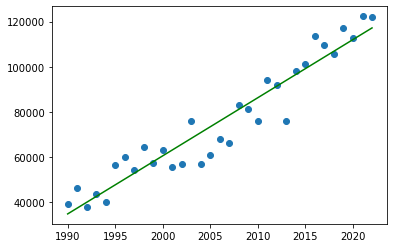

In [17]:
plt.scatter( data_frame2['Years'] , data_frame2['Salary'] )

plt.plot( data_frame2['Years'] , model.predict(X) , c = 'green')
plt.show()

In [18]:
score = model.score(X,Y)
#score

In [19]:
score

0.9109459138386182

# 4.Predict Price Material 1

In [20]:
material1_price_predict = {}

m1 = data_frame2['material 1'].values
m1_price = m1[-1]  

In [21]:
#predicting the price of material 1 for years 2023 to 2050
for year in range(2023, 2051) :
    
    m1_price = m1_price * 1.06
    material1_price_predict[year] = m1_price

In [22]:
material1_price_predict_df = pd.DataFrame.from_dict(material1_price_predict , orient='index', columns=['material 1']).reset_index()

In [23]:
material1_price_predict_df

,index,material 1
0,2023,1368.117977
1,2024,1450.205055
2,2025,1537.217358
3,2026,1629.450400
4,2027,1727.217424
5,2028,1830.850469
6,2029,1940.701498
7,2030,2057.143587
8,2031,2180.572203
9,2032,2311.406535


# 5.Predict Price Material 2

In [24]:
m2 = data_frame2['material 2'].values

In [25]:
from factors import f_to_p

In [26]:
#calculating the present value of the material 2 

material2_price_predict_first = []

for n,f in enumerate(m2) :
    
    m2_price = f_to_p(.05, n, f)
    material2_price_predict_first.append(m2_price)

material2_price_predict_first = np.array(material2_price_predict_first)

In [27]:
X1 = data_frame2['Years'].values.reshape(-1,1)
Y1 = material2_price_predict_first.reshape(-1,1)

In [28]:
model1 = LinearRegression()

In [29]:
model1.fit(X1,Y1)

LinearRegression()

In [30]:
intercept1 = model1.intercept_[0]
coefficient1 = model1.coef_[0][0]

In [31]:
#predicting the price of material 2 for years 2023 to 2050

predict_price_material2 = []

for year in range(2023, 2051) :
    
    number = (intercept1 + coefficient1 * year)
    predict_price_material2.append(number)   

In [32]:
#calculating the future value of the material 2 
material2_price_predict_last = {}

for n,p in enumerate(predict_price_material2) :
    
    material2_price_predict_last[n+2023] = p_to_f(.05, n+33, p)

#material2_price_predict_last 

In [33]:
material2_price_predict_df = pd.DataFrame.from_dict(material2_price_predict_last , orient='index', columns=['material 2']).reset_index()

In [34]:
material2_price_predict_df

,index,material 2
0,2023,225.393644
1,2024,229.571306
2,2025,233.603251
3,2026,237.464462
4,2027,241.127785
5,2028,244.563780
6,2029,247.740555
7,2030,250.623598
8,2031,253.175594
9,2032,255.356231


# 6.Visualization Predicted Price Material 2

In [35]:
#model1.predict(X1)

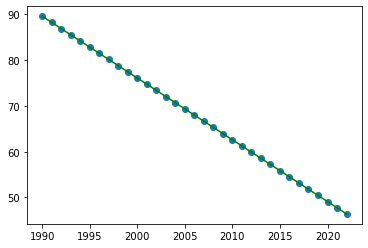

In [36]:
plt.scatter( data_frame2['Years'] , material2_price_predict_first )

plt.plot( data_frame2['Years'] , model1.predict(X1) , c = 'green')
plt.show()

In [37]:
score1 = model1.score(X1,Y1)
#score1

In [38]:
score1

1.0

# 7.demand_factor column

In [39]:
data_frame3 = pd.read_excel('New_data.xlsx')

In [40]:
#Adding an exponential_factor column to the DataFrame using an exponential decay formula

data_frame3['exponential_factor'] = np.exp(-(data_frame3['Years'] - 1990)  / 50)

In [41]:
data_frame3.to_excel('New_data.xlsx')

 # 8.Predict demand

In [42]:
X3 = data_frame3['exponential_factor'].values.reshape(-1,1)
Y3 = data_frame3['demand'].values.reshape(-1,1)

In [43]:
model3 = LinearRegression()

In [44]:
model3.fit(X3,Y3)

LinearRegression()

In [45]:
intercept3 = model3.intercept_[0]
coefficient3 = model3.coef_[0][0]

In [46]:
#predicting the demand of material 2 for years 2023 to 2050
predict_demand = {}

for year in range(2023, 2051) :
     predict_demand[year] = (intercept3 + coefficient3 * np.exp(-(year - 1990)/ 50))

#predict_demand  

In [47]:
predict_demand_df = pd.DataFrame.from_dict(predict_demand , orient='index', columns=['demand']).reset_index()

In [48]:
predict_demand_df

,index,demand
0,2023,55.655541
1,2024,54.618177
2,2025,53.601354
3,2026,52.604666
4,2027,51.627714
5,2028,50.670106
6,2029,49.731461
7,2030,48.811401
8,2031,47.909561
9,2032,47.025577


# 9.Visualization Predicted demand

In [49]:
#model3.predict(X3)

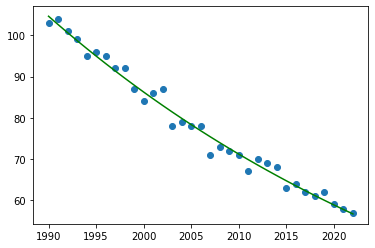

In [50]:
plt.scatter( data_frame2['Years'] , data_frame2['demand'] )

plt.plot( data_frame2['Years'] , model3.predict(X3) , c = 'green')
plt.show()

In [51]:
score3 = model3.score(X3,Y3)

In [52]:
score3

0.9849573838479752

# 10.Predict Price

In [53]:
def predict(x,intercept,coefficient):
    return intercept + coefficient * x

In [54]:
X4 = data_frame["Years"].values.reshape(-1,1)
Y4 = data_frame["price"].values.reshape(-1,1)

In [55]:
model4 = LinearRegression()

In [56]:
model4.fit(X4,Y4)

LinearRegression()

In [57]:
intercept4 = model4.intercept_[0]
coefficient4 = model4.coef_[0][0]

In [58]:
#predicting the price for years 2023 to 2050

predicted_price = pd.DataFrame({'Years' : [i for i in range(2023, 2051)],
                              'price': [predict(x,intercept4,coefficient4) for x in range(2023,2051)]})

In [59]:
predicted_price

,Years,price
0,2023,5358.0
1,2024,5483.5
2,2025,5609.0
3,2026,5734.5
4,2027,5860.0
5,2028,5985.5
6,2029,6111.0
7,2030,6236.5
8,2031,6362.0
9,2032,6487.5


# 11.Visualization Predicted price

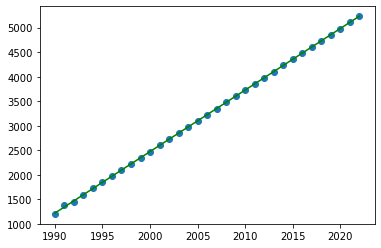

In [60]:
plt.scatter(data_frame3['Years'] , data_frame3['price'] )

plt.plot( data_frame3['Years'] , model4.predict(X4) , c = 'green')
plt.show()

In [61]:
score4 = model4.score(X4,Y4)

In [62]:
score4

0.9999653378861689

# Question1

In [63]:
#Combining all predicted data into a single DataFrame.
predicted_data = pd.concat([predict_salary_df, material1_price_predict_df , material2_price_predict_df ,predict_demand_df,predicted_price], axis=1)

In [64]:
predicted_data.head()

,index,Salary,index,material 1,index,material 2,index,demand,Years,price
0,2023,119794.784091,2023,1368.117977,2023,225.393644,2023,55.655541,2023,5358.0
1,2024,122370.771390,2024,1450.205055,2024,229.571306,2024,54.618177,2024,5483.5
2,2025,124946.758690,2025,1537.217358,2025,233.603251,2025,53.601354,2025,5609.0
3,2026,127522.745989,2026,1629.450400,2026,237.464462,2026,52.604666,2026,5734.5
4,2027,130098.733289,2027,1727.217424,2027,241.127785,2027,51.627714,2027,5860.0


In [65]:
predicted_data = predicted_data[["Years","Salary","price","demand","material 1","material 2"]]

In [66]:
predicted_data.head()

,Years,Salary,price,demand,material 1,material 2
0,2023,119794.784091,5358.0,55.655541,1368.117977,225.393644
1,2024,122370.771390,5483.5,54.618177,1450.205055,229.571306
2,2025,124946.758690,5609.0,53.601354,1537.217358,233.603251
3,2026,127522.745989,5734.5,52.604666,1629.450400,237.464462
4,2027,130098.733289,5860.0,51.627714,1727.217424,241.127785


In [67]:
#combining the actuall data and predicted one
final = pd.concat([data_frame, predicted_data] , axis = 0).reset_index()

In [68]:
final

,index,Years,Salary,material 1,material 2,demand,price
0,0,1990,39343.000000,200.000000,89.600000,103.000000,1200.0
1,1,1991,46205.000000,212.000000,92.662500,104.000000,1375.0
2,2,1992,37731.000000,224.720000,95.807250,101.000000,1451.0
3,3,1993,43525.000000,238.203200,99.034819,99.000000,1593.0
4,4,1994,39891.000000,252.495392,102.345626,95.000000,1718.5
...,...,...,...,...,...,...,...
56,23,2046,179042.491979,5225.868178,215.143774,36.339007,8244.5
57,24,2047,181618.479278,5539.420269,204.117656,35.684136,8370.0
58,25,2048,184194.466578,5871.785485,191.451066,35.042232,8495.5
59,26,2049,186770.453877,6224.092614,177.007523,34.413039,8621.0


In [69]:
#Defines a discount function based on demand
def discount(demand):
    if demand > 60:
        discount_rate = 0.18
    elif demand > 40 and demand <= 60:
        discount_rate = 0.1
    elif demand > 20 and demand <= 40:
        discount_rate = 0.05
    else:
        discount_rate = 0
    return discount_rate

In [70]:
final["New Price material 2"] = final.apply(lambda row : row["material 2"] * (1 -discount(row["demand"])), axis=1)

In [71]:
final

,index,Years,Salary,material 1,material 2,demand,price,New Price material 2
0,0,1990,39343.000000,200.000000,89.600000,103.000000,1200.0,73.472000
1,1,1991,46205.000000,212.000000,92.662500,104.000000,1375.0,75.983250
2,2,1992,37731.000000,224.720000,95.807250,101.000000,1451.0,78.561945
3,3,1993,43525.000000,238.203200,99.034819,99.000000,1593.0,81.208551
4,4,1994,39891.000000,252.495392,102.345626,95.000000,1718.5,83.923414
...,...,...,...,...,...,...,...,...
56,23,2046,179042.491979,5225.868178,215.143774,36.339007,8244.5,204.386586
57,24,2047,181618.479278,5539.420269,204.117656,35.684136,8370.0,193.911773
58,25,2048,184194.466578,5871.785485,191.451066,35.042232,8495.5,181.878513
59,26,2049,186770.453877,6224.092614,177.007523,34.413039,8621.0,168.157147


In [72]:
#calculating profit
final["profit"] = (final["demand"] * (final["price"] -  final["material 1"] - final["New Price material 2"] ) )- (final["Salary"])

In [73]:
final

,index,Years,Salary,material 1,material 2,demand,price,New Price material 2,profit
0,0,1990,39343.000000,200.000000,89.600000,103.000000,1200.0,73.472000,56089.384000
1,1,1991,46205.000000,212.000000,92.662500,104.000000,1375.0,75.983250,66844.742000
2,2,1992,37731.000000,224.720000,95.807250,101.000000,1451.0,78.561945,78188.523555
3,3,1993,43525.000000,238.203200,99.034819,99.000000,1593.0,81.208551,82560.236614
4,4,1994,39891.000000,252.495392,102.345626,95.000000,1718.5,83.923414,91406.713475
...,...,...,...,...,...,...,...,...,...
56,23,2046,179042.491979,5225.868178,215.143774,36.339007,8244.5,204.386586,-76775.616023
57,24,2047,181618.479278,5539.420269,204.117656,35.684136,8370.0,193.911773,-87531.262071
58,25,2048,184194.466578,5871.785485,191.451066,35.042232,8495.5,181.878513,-98627.082397
59,26,2049,186770.453877,6224.092614,177.007523,34.413039,8621.0,168.157147,-110072.384452


In [74]:
#Identifies years where the profit is negative
final[final["profit"] <= 0]

,index,Years,Salary,material 1,material 2,demand,price,New Price material 2,profit
48,15,2038,158434.593583,3278.774346,257.951487,42.077370,7240.5,232.156339,-1504.126589
49,16,2039,161010.580882,3475.500807,256.105262,41.308872,7366.0,230.494736,-9819.926295
50,17,2040,163586.568182,3684.030855,253.429535,40.555591,7491.5,228.086582,-18422.593016
51,18,2041,166162.555481,3905.072706,249.845973,39.817226,7617.0,237.353674,-27814.671743
52,19,2042,168738.542781,4139.377069,245.270480,39.093482,7742.5,233.006956,-36988.974506
53,20,2043,171314.530080,4387.739693,239.612824,38.384069,7868.0,227.632182,-46465.427902
54,21,2044,173890.517380,4651.004074,232.776225,37.688703,7993.5,221.137414,-56250.562906
55,22,2045,176466.504679,4930.064319,224.656935,37.007107,8119.0,213.424088,-66351.429998
56,23,2046,179042.491979,5225.868178,215.143774,36.339007,8244.5,204.386586,-76775.616023
57,24,2047,181618.479278,5539.420269,204.117656,35.684136,8370.0,193.911773,-87531.262071


<font  size=4>
.تا سال 2037 سودده بوده است چون بعد از این سال سود منفی میشود


# Question2



In [76]:
table = final[final["Years"] <= 2022]

In [77]:
table.head()

,index,Years,Salary,material 1,material 2,demand,price,New Price material 2,profit
0,0,1990,39343.0,200.000000,89.600000,103.0,1200.0,73.472000,56089.384000
1,1,1991,46205.0,212.000000,92.662500,104.0,1375.0,75.983250,66844.742000
2,2,1992,37731.0,224.720000,95.807250,101.0,1451.0,78.561945,78188.523555
3,3,1993,43525.0,238.203200,99.034819,99.0,1593.0,81.208551,82560.236614
4,4,1994,39891.0,252.495392,102.345626,95.0,1718.5,83.923414,91406.713475


In [78]:
#Calculating the savings as 25% of the profit, further reduced by 20%
table["saved"] = table["profit"] * 0.25 * 0.2

In [79]:
table.head()

,index,Years,Salary,material 1,material 2,demand,price,New Price material 2,profit,saved
0,0,1990,39343.0,200.000000,89.600000,103.0,1200.0,73.472000,56089.384000,2804.469200
1,1,1991,46205.0,212.000000,92.662500,104.0,1375.0,75.983250,66844.742000,3342.237100
2,2,1992,37731.0,224.720000,95.807250,101.0,1451.0,78.561945,78188.523555,3909.426178
3,3,1993,43525.0,238.203200,99.034819,99.0,1593.0,81.208551,82560.236614,4128.011831
4,4,1994,39891.0,252.495392,102.345626,95.0,1718.5,83.923414,91406.713475,4570.335674


In [80]:
#This loop calculates the present value (PV) of the profits using a discount rate (i) of 5%
i = 0.05
PV = 0
for n,f in enumerate(table["profit"]):
    PV += f_to_p(i, n, f)

In [81]:
PV

1725861.5667714828

In [82]:
n = 2032 - 2022 + 1
saving = p_to_a(i, n, PV)

In [83]:
#Calculating the annuity value (saving) for the period from 2022 to 2032 using the present value (PV)
saving

207774.56088996632

<font  size=4>
.این شخص باید از سال 2022 تا 2032 مقدار ثابت 20774.56 دلار پس انداز کند

# Question3


In [84]:
#This loop calculates the future value (FV) of the profits using a discount rate (i) of 5%.
i = 0.05
FV = 0
for n,p in enumerate(table["profit"]):
    FV += p_to_f(i, 32 - n , p)

In [85]:
FV

8223629.348578641

In [86]:
profit = 250000

In [87]:
#The expected profit is given as 250,000.
#The final price is calculated by subtracting the expected profit from the future value (FV)
price = FV - profit

In [88]:
price

7973629.348578641

<font  size=4>
.خرید این شخص باید7973629.348دلار باشد تا 250000دلار در سال پایه سود کند 